In [15]:
import pysm3
import pysm3.units as u
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from funzioni import get_pixel_value_norm
#from funzioni import polarizzazione 
#from funzioni import allpixel_norm


In [16]:
import warnings
warnings.filterwarnings("ignore")

In [17]:
#costants
k = 1.38e-23
h = 6.626e-34
T=20
c=10e8
nu_I_d=545
nu_I_s=0.408
nu_P_d=353
nu_P_s=23
beta_d=1.54
beta_s=-3

In [18]:
frequencies = np.array([40,50,60,68,78,89,100,119,140,166,195,235,280,337,402])
pixels = np.arange(0,192)
#Stokes = np.array([0,1,2])
ref_d = np.array([nu_I_d,nu_P_d,nu_P_d])
ref_s = np.array([nu_I_s,nu_P_s,nu_P_s])

In [19]:
Sky_d0=pysm3.Sky(nside=4, preset_strings=["d0"])
Sky_d1=pysm3.Sky(nside=4, preset_strings=["d1"])
Sky_d2=pysm3.Sky(nside=4, preset_strings=["d2"])
Sky_d3=pysm3.Sky(nside=4, preset_strings=["d3"])
Sky_d4=pysm3.Sky(nside=4, preset_strings=["d4"])
Sky_d5=pysm3.Sky(nside=4, preset_strings=["d5"])
Sky_d6=pysm3.Sky(nside=4, preset_strings=["d6"])
Sky_d7=pysm3.Sky(nside=4, preset_strings=["d7"])
Sky_d8=pysm3.Sky(nside=4, preset_strings=["d8"])
#Sky_d9=pysm3.Sky(nside=4, preset_strings=["d9"])
#Sky_d10=pysm3.Sky(nside=4, preset_strings=["d10"])
#Sky_d11=pysm3.Sky(nside=4, preset_strings=["d11"])
#Sky_d12=pysm3.Sky(nside=4, preset_strings=["d12"])



In [20]:
Sky_s0=pysm3.Sky(nside=4, preset_strings=["s0"])
Sky_s1=pysm3.Sky(nside=4, preset_strings=["s1"])
Sky_s2=pysm3.Sky(nside=4, preset_strings=["s2"])
Sky_s3=pysm3.Sky(nside=4, preset_strings=["s3"])
#Sky_s4=pysm3.Sky(nside=4, preset_strings=["s4"])
#Sky_s5=pysm3.Sky(nside=4, preset_strings=["s5"])
#Sky_s6=pysm3.Sky(nside=4, preset_strings=["s6"])
#Sky_s7=pysm3.Sky(nside=4, preset_strings=["s7"])

In [21]:

d0=np.array(get_pixel_value_norm(frequencies,ref_frequencies=ref_d,sky=Sky_d0))
d1=np.array(get_pixel_value_norm(frequencies,ref_frequencies=ref_d,sky=Sky_d1))
d2=np.array(get_pixel_value_norm(frequencies,ref_frequencies=ref_d,sky=Sky_d2))
d3=np.array(get_pixel_value_norm(frequencies,ref_frequencies=ref_d,sky=Sky_d3))
d4=np.array(get_pixel_value_norm(frequencies,ref_frequencies=ref_d,sky=Sky_d4))
d5=np.array(get_pixel_value_norm(frequencies,ref_frequencies=ref_d,sky=Sky_d5))
#d6=np.array(get_pixel_value_norm(frequencies,ref_frequencies=ref_d,sky=Sky_d6))
d7=np.array(get_pixel_value_norm(frequencies,ref_frequencies=ref_d,sky=Sky_d7))
#d8=np.array(get_pixel_value_norm(frequencies,ref_frequencies=ref_d,sky=Sky_d8))
#d9=np.array(get_pixel_value_norm(frequencies,ref_frequencies=ref_d,sky=Sky_d9))
#d10=np.array(get_pixel_value_norm(frequencies,ref_frequencies=ref_d,sky=Sky_d10))
#d11=np.array(get_pixel_value_norm(frequencies,ref_frequencies=ref_d,sky=Sky_d11))
#d12=np.array(get_pixel_value_norm(frequencies,ref_frequencies=ref_d,sky=Sky_d12))
print(d0.shape)




(15, 3, 192)


In [22]:
d=d0-d1
print(d0.shape)
print(d1.shape)
print(d.shape)

(15, 3, 192)
(15, 3, 192)
(15, 3, 192)


Text(0.5, 0, '$Ghz$')

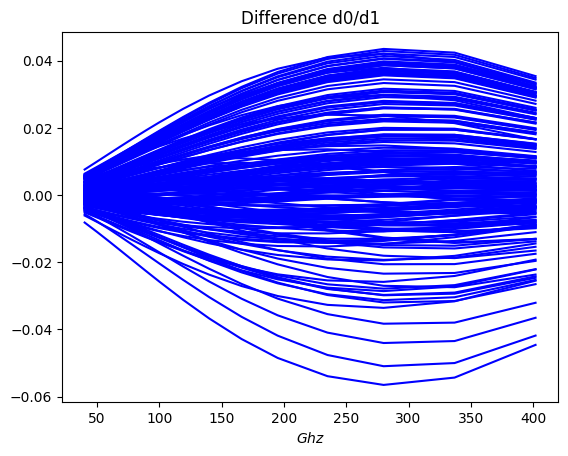

In [23]:
for i,val_i in enumerate(d0[0,0,:]):
    plt.plot(frequencies,d[:,0,i],'-',color='blue',label="d0-d1")
   

plt.title("Difference d0/d1")
#plt.yscale('log')
#plt.xscale('log')
plt.xlabel(r'$Ghz$')
#plt.legend()

Text(0, 0.5, '$\\mu$$K_{RJ}$')

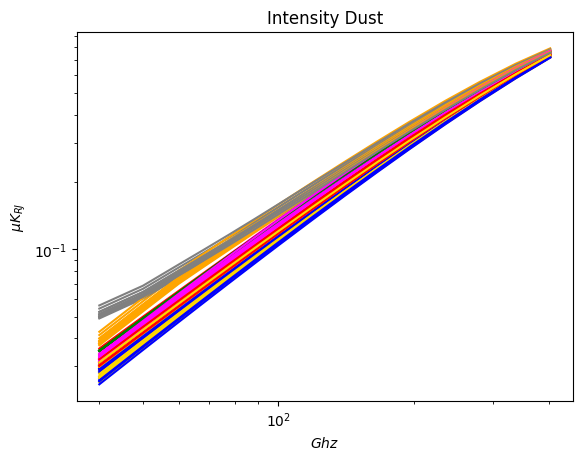

In [24]:

for i,val_i in enumerate(d0[:,0,:]):
    plt.plot(frequencies,d0[:,0,i],'-',color='green',label="I_d0")
    plt.plot(frequencies,d1[:,0,i],'-',color='red',label="I_d1")
    plt.plot(frequencies,d2[:,0,i],'-',color='blue',label="I_d2")
    plt.plot(frequencies,d3[:,0,i],'-',color='gold',label="I_d3")
    plt.plot(frequencies,d4[:,0,i],'-',color='magenta',label="I_d4")
    plt.plot(frequencies,d5[:,0,i],'-',color='orange',label="I_d5")
    #plt.plot(frequencies,d6[:,0,i],'-',color='black',label="I_d6")
    plt.plot(frequencies,d7[:,0,i],'-',color='grey',label="I_d7")
    #plt.plot(frequencies,d8[:,0,i],'-',color='salmon',label="I_d8")
    #plt.plot(frequencies,d9[:,0,i],'-',color='springgreen',label="I_d9")
    #plt.plot(frequencies,d10[:,0,i],'-',color='maroon',label="I_d10")
    #plt.plot(frequencies,d11[:,0,i],'-',color='cyan',label="I_d11")
    #plt.plot(frequencies,d12[:,0,i],'-',color='darkviolet',label="I_d12")


plt.title("Intensity Dust")
plt.yscale('log')
plt.xscale('log')
plt.xlabel(r'$Ghz$')
plt.ylabel(r'$\mu$$K_{RJ}$')
#plt.legend()


In [25]:

s0=np.array(get_pixel_value_norm(frequencies,ref_frequencies=ref_s,sky=Sky_s0))
s1=np.array(get_pixel_value_norm(frequencies,ref_frequencies=ref_s,sky=Sky_s1))
s2=np.array(get_pixel_value_norm(frequencies,ref_frequencies=ref_s,sky=Sky_s2))
s3=np.array(get_pixel_value_norm(frequencies,ref_frequencies=ref_s,sky=Sky_s3))
#s4=np.array(get_pixel_value_norm(frequencies,ref_frequencies=ref_s,sky=Sky_s4))
#s5=np.array(get_pixel_value_norm(frequencies,ref_frequencies=ref_s,sky=Sky_s5))
#s6=np.array(get_pixel_value_norm(frequencies,ref_frequencies=ref_s,sky=Sky_s6))
#s7=np.array(get_pixel_value_norm(frequencies,ref_frequencies=ref_s,sky=Sky_s7))

print(s0.shape)

(15, 3, 192)


In [26]:
s=s0-s1

Text(0.5, 0, '$Ghz$')

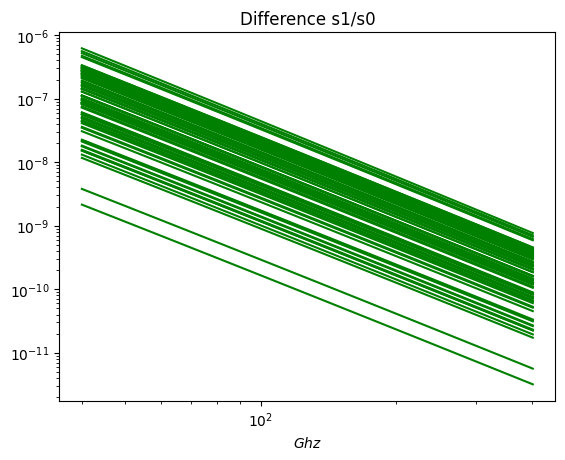

In [27]:
for i,val_i in enumerate(s0[0,0,:]):
    plt.plot(frequencies,s[:,0,i],'-',color='green',label="s0-s1")

plt.title("Difference s1/s0")
plt.yscale('log')
plt.xscale('log')
plt.xlabel(r'$Ghz$')
#plt.legend()


Text(0, 0.5, '$\\mu$$K_{RJ}$')

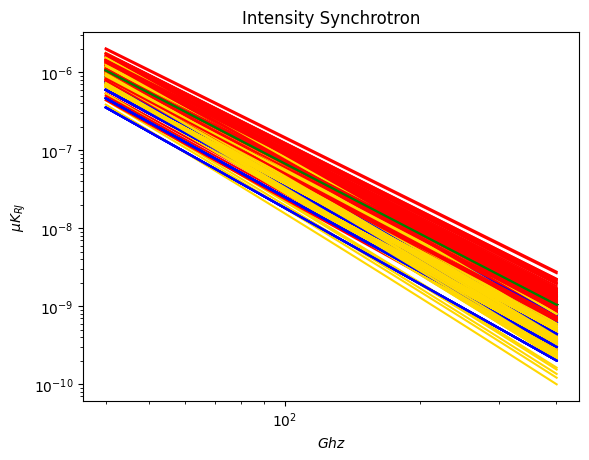

In [28]:
for i,_ in enumerate(s0[0,0,:]):
    plt.plot(frequencies,s0[:,0,i],'-',color='green',label="I_s0")
    plt.plot(frequencies,s1[:,0,i],'-',color='red',label="I_s1")
    plt.plot(frequencies,s2[:,0,i],'-',color='blue',label="I_s2")
    plt.plot(frequencies,s3[:,0,i],'-',color='gold',label="I_s3")
    #plt.plot(frequencies,s4[:,0,i],'-',color='magenta',label="I_s4")
    #plt.plot(frequencies,s5[:,0,i],'-',color='orange',label="I_s5")
    #plt.plot(frequencies,s6[:,0,i],'-',color='black',label="I_s6")
    #plt.plot(frequencies,s7[:,0,i],'-',color='grey',label="I_s7")
plt.title("Intensity Synchrotron")
plt.yscale('log')
plt.xscale('log')
plt.xlabel(r'$Ghz$')
plt.ylabel(r'$\mu$$K_{RJ}$')
#plt.legend()